# Altair Practice
For the CDCS Python Library Series, Course 3, Week 2, December 7-11 2020
***
**Reference:**
This Jupyter Notebook is based on the datacamp tutorial [Altair in Python: Data Visualizations](https://www.datacamp.com/community/tutorials/altair-in-python)

### Step 1
First, we'll import the libraries we'll need for visualizing data with Altair:

In [6]:
# To prevent SSL certificate failure
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd  # Altair stores data as a pandas DataFrame (a type of table)
import altair as alt
from vega_datasets import data as vega_data  # Altair comes with sample datasets you can practice with

### Step 2
Next, we'll load and explore a sample dataset from Altair:

In [8]:
movies_df = pd.read_json(vega_data.movies.url)  # JSON is a data format, like CSV
print(type(movies_df))

<class 'pandas.core.frame.DataFrame'>


A **DataFrame** is a data structure in the [pandas](https://pandas.pydata.org/docs/) library that organizes data into a table with rows and columns.  Don't worry too much about understanding how to use pandas.  All that you need to know about it for now is that Altair visualizes data that's stored in a DataFrame, so you'll always need to begin by turning the data you want to visualize into a DataFrame.

Let's see what our data looks like now:

In [13]:
# movies_df.head()  # .head() returns the first five rows and .tail() returns the last five rows by default
movies_df.tail(10)  # You can specify the number of rows you'd like to return inside the parentheses

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
3191,The Young Victoria,11001272.0,11001272.0,3273039.0,35000000.0,Dec 18 2009,PG,NaN,Apparition,Based on Real Life Events,Drama,Dramatization,None,76.0,7.2,8408.0
3192,Zathura,28045540.0,58545540.0,22025352.0,65000000.0,Nov 11 2005,PG,113.0,Sony Pictures,Based on Book/Short Story,Adventure,Fantasy,Jon Favreau,75.0,NaN,NaN
3193,Zero Effect,2080693.0,2080693.0,NaN,5000000.0,Jan 30 1998,R,NaN,Sony Pictures,Original Screenplay,Comedy,Contemporary Fiction,None,66.0,6.8,8489.0
3194,Zoolander,45172250.0,60780981.0,NaN,28000000.0,Sep 28 2001,PG-13,89.0,Paramount Pictures,Original Screenplay,Comedy,Contemporary Fiction,Ben Stiller,62.0,6.4,69296.0
3195,Zombieland,75590286.0,98690286.0,28281155.0,23600000.0,Oct 02 2009,R,87.0,Sony Pictures,Original Screenplay,Comedy,Fantasy,Ruben Fleischer,89.0,7.8,81629.0
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,21240321.0,24000000.0,Oct 31 2008,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084.0,83080084.0,20983030.0,85000000.0,Mar 02 2007,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328.0,12506188.0,6679409.0,35000000.0,Aug 11 2006,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,NaN,80000000.0,Oct 28 2005,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0
3200,The Mask of Zorro,93828745.0,233700000.0,NaN,65000000.0,Jul 17 1998,PG-13,136.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,82.0,6.7,4789.0


In [12]:
movies_df.shape

(3201, 16)

The `.shape` method returns the number of rows and number of columns in the data frame.  The output above tells us we have 3,201 rows of data and 16 columns of data.


### Step 3
Let's focus on the `Release Date` column first.  In order group and order movies by the year they were released, we can ignore the month and day in this column and focus on the year, turning it the release date from a `string` to a `datetime` data type.

We'll write a function to extract the year from a DataFrame column...

In [16]:
def getYear(column_value):
    date_format = '%b %d %Y'  # %b symbolizes short month name, %d symbolizes numeric day, %Y symbolizes four-digit year
    return pd.to_datetime(column_value, format=date_format).year

...and then we'll run the function on the `movie_df` column `Release Date`:

In [17]:
# In pandas, we can reference the column of a DataFrame with square brackets
# containing the column name in quotation marks (as a string).
# We'll store the years in a new variable, release_years
release_years = movies_df["Release Date"].apply(getYear)

In [18]:
release_years[-10:]  # print the last 10 years

3191    2009
3192    2005
3193    1998
3194    2001
3195    2009
3196    2008
3197    2007
3198    2006
3199    2005
3200    1998
Name: Release Date, dtype: int64

Now we can add a new column to the `movies_df` dataframe with the release years:

In [19]:
movies_df["Release Year"] = release_years
movies_df.head(5)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Release Year
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0,1998
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0,1998
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0,1998
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN,1998
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0,1998


Ta da!  The last column of the DataFrame is now `Release Year`.

### Step 4
Let's use Altair to visualize some of the data in our `movies_df` DataFrame.

In [23]:
# # UNCOMMENT THIS CELL IF YOU ARE WORKING OFFLINE (WITHOUT AN INTERNET CONNECTION)
# # alt.renderers.enable('notebook')  # allows Altair to "render inline", meaning we can see visualizations we make when using Jupyter Notebooks
# alt.renderers.enable('mimetype')    # the same as above but for Jupyter Lab

What release year you would like to focus our visualizations on?

In [27]:
movies_2000 = movies_df[movies_df["Release Year"] == 2000]
movies_2000.shape

(188, 17)

In Altair, we can make a chart by specifying:
* Data source, meaning the DataFrame containing the data we want to visualize
* Marks, meaning the type of visualization we want to display our data in
* Econdings, meaning how we want data to be visually represented

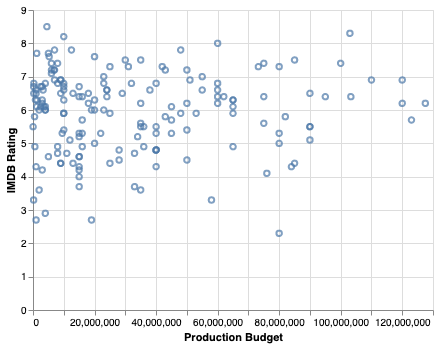

In [41]:
# Chart is an object in Altair that takes a dataframe as input
# Charts won't be built unless marks and encodings are included with a dataframe
alt.Chart(movies_2000).mark_point().encode(
    alt.X('Production Budget'),   # a column from our DataFrame for the X axis
    alt.Y('IMDB Rating')      # a column from our DataFrame for the Y axis
)

How could we bring in another column of data to this visualization?

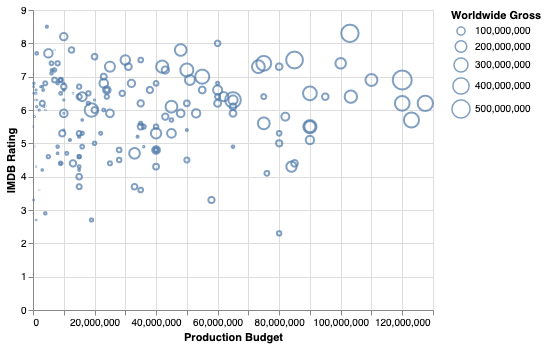

In [43]:
alt.Chart(movies_2000).mark_point().encode(
    alt.X('Production Budget'),   # a column from our DataFrame for the X axis
    alt.Y('IMDB Rating'),         # a column from our DataFrame for the Y axis
    alt.Size('Worldwide Gross')   # a column from our DataFrame for the size of the data glyphs
)

Notice how Altair has automatically added a legend to our visualization - how nice!

Let's play with the design of the visualization a bit...

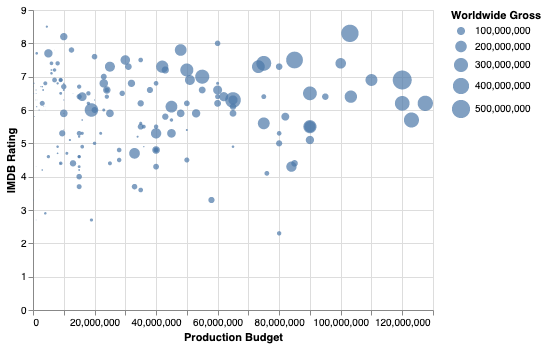

In [44]:
alt.Chart(movies_2000).mark_point(filled=True).encode(
    alt.X('Production Budget'),   # a column from our DataFrame for the X axis
    alt.Y('IMDB Rating'),         # a column from our DataFrame for the Y axis
    alt.Size('Worldwide Gross')   # a column from our DataFrame for the size of the data glyphs
)

What does this visualization tell you?  Do you see any meaningful relationships or patterns?

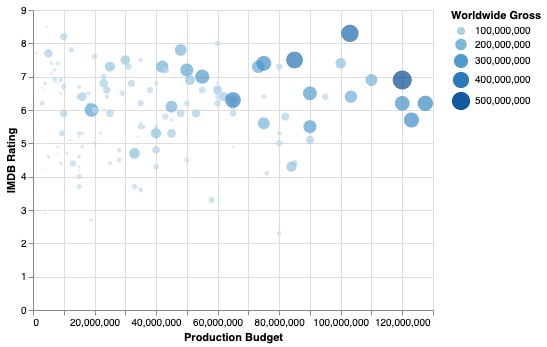

In [45]:
alt.Chart(movies_2000).mark_point(filled=True).encode(
    alt.X('Production Budget'),   # a column from our DataFrame for the X axis
    alt.Y('IMDB Rating'),     # a column from our DataFrame for the Y axis
    alt.Size('Worldwide Gross'),         # a column from our DataFrame for the size of the data glyphs
    alt.Color('Worldwide Gross'),
    alt.OpacityValue(0.7)
)

How could we bring ANOTHER column of data into our visualization?

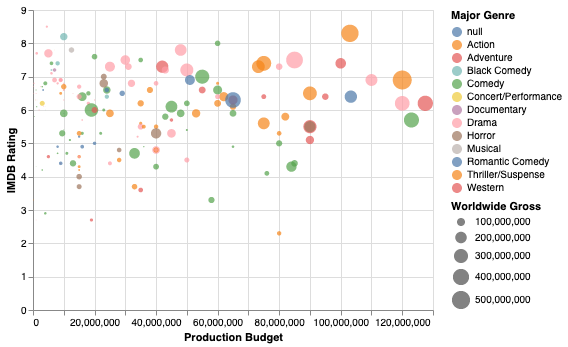

In [46]:
alt.Chart(movies_2000).mark_point(filled=True).encode(
    alt.X('Production Budget'),   # a column from our DataFrame for the X axis
    alt.Y('IMDB Rating'),         # a column from our DataFrame for the Y axis
    alt.Size('Worldwide Gross'),  # a column from our DataFrame for the size of the data glyphs
    alt.Color('Major Genre'),
    alt.OpacityValue(0.7)
)

Again, note how Altair automatically updates the visualization to include a relevant legend.

### Step 5
Let's add interactions to our visualization!

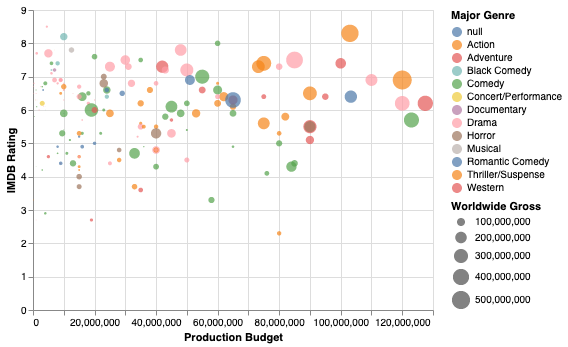

In [48]:
alt.Chart(movies_2000).mark_point(filled=True).encode(
    alt.X('Production Budget'),   # a column from our DataFrame for the X axis
    alt.Y('IMDB Rating'),     # a column from our DataFrame for the Y axis
    alt.Size('Worldwide Gross'),         # a column from our DataFrame for the size of the data glyphs
    alt.Color('Major Genre'),
    alt.OpacityValue(0.7),
    tooltip = [alt.Tooltip('Title'),
               alt.Tooltip('Production Budget'),
               alt.Tooltip('IMDB Rating'),
               alt.Tooltip('Worldwide Gross'),
               alt.Tooltip('Major Genre'),
               alt.Tooltip('Distributor')
              ]
)

Try hovering over the visualization!  What happens???